# Support Vector Machines (SVM)

- Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection
- goal is to create the best line or decision boundary that can segregate n-dimensional space into classes
- can better handle highly-dimensional data
- Can handle linear as well as non-linear data
- SVM Algorithm types
    - Linear SVM (for linearly separable data)
    - Kernel SVM (for non-linear separable data)
- used for classification as well as Regression problems, but mostly used for Classification
- Classifier, forward neural network, supervised learning algorithm
- Clustering Algorithm
- Hierarchical Algorithm
- ```Hyperplane```
    - the best decision boundary differentiating classes
    - it can be linear/straight line for linearly separable data / 2 features
    - it can be non-linear plane / 2-D plane for non-linearly separable data / 3 features
- ```Support Vectors```
    - vectors / data points closest to the hyperplane are called Support Vectors
- ```Margin```
    - distance between the hyperplane and the support vectors (nearest data point) is called Margin
    - margin is expected to be as large as possible to find the optimal hyperplance
- ```Optimal Hyperplane```
    - the hyperplanee with maximum margin is called the optimal Hyperplane
-  Model performance can be altered by changing the value of ```C (Regularization factor)```, ```gamma```, and ```kernel```

# Note for Kernel Trick
- when there is no separating plane
    - Use bigger set of features, makes use of kernel trick
    - Need to go for higher dimensions / more features, so use kernel function


## import libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [2]:
# from google.colab import files
# uploaded = files.upload()
# D9data3.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [3]:
dataset = pd.read_csv('D9data3.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.shape

(400, 3)

In [5]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Imputation (Null check)

In [7]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## identify X & Y

In [8]:
x = dataset.iloc[ : , :-1].values
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [9]:
y = dataset.iloc[ : , -1].values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

## splitting

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
x_train[:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]], dtype=int64)

In [13]:
y_train[:5]

array([1, 0, 0, 0, 1], dtype=int64)

## Preprocessing

### Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
x_train = sc.fit_transform(x_train)
x_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [17]:
x_test = sc.fit_transform(x_test)
x_test[:5]

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674]])

## Linear SVM
- for linearly separable data

### Modeling - Linear SVM

In [18]:
from sklearn.svm import SVC

In [19]:
lsvmclassifier = SVC(C=1, kernel='linear', random_state=0)
# C-Support Vector Classification
# C : Regularization parameter

### Training - Linear SVM

In [20]:
lsvmclassifier.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

### Prediction - Linear SVM

In [21]:
lsvmclassifier.predict(sc.transform([[30, 78000]]))
# prediction with custom test case

array([0], dtype=int64)

In [22]:
y_pred_linear = lsvmclassifier.predict(x_test)
y_pred_linear[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation - Linear SVM

#### confusion_matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test, y_pred_linear)

array([[52,  6],
       [ 3, 19]], dtype=int64)

#### classification_report

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80



#### accuracy_score

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_pred_linear)

0.8875

#### precision_score

In [29]:
from sklearn.metrics import precision_score

In [30]:
precision_score(y_test, y_pred_linear)

0.76

#### recall_score

In [31]:
from sklearn.metrics import recall_score

In [32]:
recall_score(y_test, y_pred_linear)

0.8636363636363636

## Kernel SVM (c=1)
- for non-linearly separable data

### Modeling - Kernel SVM  (c=1)

In [33]:
from sklearn.svm import SVC

In [34]:
ksvmclassifier = SVC(C=1, kernel='rbf', random_state=0)

### Training - Kernel SVM (c=1)

In [35]:
ksvmclassifier.fit(x_train, y_train)

SVC(C=1, random_state=0)

### Prediction - Kernel SVM (c=1)

In [36]:
y_pred_kernel = ksvmclassifier.predict(x_test)
y_pred_kernel[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation Kernel SVM (c=1)

#### confusion_matrix

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, y_pred_kernel)

array([[54,  4],
       [ 1, 21]], dtype=int64)

#### classification_report

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, y_pred_kernel))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80



#### accuracy_score

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred_kernel)
# higher accuracy means mis-classification has reduced

0.9375

#### precision_score

In [43]:
from sklearn.metrics import precision_score

In [44]:
precision_score(y_test, y_pred_kernel)

0.84

#### recall_score

In [45]:
from sklearn.metrics import recall_score

In [46]:
recall_score(y_test, y_pred_kernel)

0.9545454545454546

## Kernel SVM (c=100)

### Modeling - Kernel SVM (c=100)

In [47]:
from sklearn.svm import SVC

In [48]:
ksvmclassifier100 = SVC(C=100, kernel='rbf', random_state=0)

### Training - Kernel SVM (c=100)

In [49]:
ksvmclassifier100.fit(x_train, y_train)

SVC(C=100, random_state=0)

### Prediction - Kernel SVM(c=100)

In [50]:
y_pred_kernel100 =  ksvmclassifier100.predict(x_test)
y_pred_kernel100[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation - Kernel SVM (c=100)

#### confusion_matrix

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test, y_pred_kernel100)

array([[54,  4],
       [ 1, 21]], dtype=int64)

#### classification_report

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test, y_pred_kernel100))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80



#### accuracy_score

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test, y_pred_kernel100)

0.9375

#### precision_score

In [57]:
from sklearn.metrics import precision_score

In [58]:
precision_score(y_test, y_pred_kernel100)

0.84

#### recall_score

In [59]:
from sklearn.metrics import recall_score

In [60]:
recall_score(y_test, y_pred_kernel100)

0.9545454545454546

# SVM Application

##  import libs

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [62]:
# from google.colab import files
# uploaded = files.upload()
# D13data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [63]:
dataset = pd.read_csv('D13data1.csv')
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [64]:
dataset.shape

(17898, 9)

In [65]:
dataset.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


## imputation

In [67]:
dataset.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

## handling column names

In [68]:
dataset.columns
# column names have spaces that can be trimmed & names can be shortened

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

### stripping column names

In [69]:
dataset.columns = dataset.columns.str.strip()
# stripping column names
dataset.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

### renaming column names

In [70]:
dataset.columns = ['Mean', 'SD', 'Kurtosis', 'Skewness', 'Mean_DM-SNR', 'SD_DM-SNR', 'Kurtosis_DM-SNR', 'Skewness_DM-SNR', 'target_class']
dataset.columns

Index(['Mean', 'SD', 'Kurtosis', 'Skewness', 'Mean_DM-SNR', 'SD_DM-SNR',
       'Kurtosis_DM-SNR', 'Skewness_DM-SNR', 'target_class'],
      dtype='object')

## checking dataset after handling column names

In [71]:
dataset.head()

,Mean,SD,Kurtosis,Skewness,Mean_DM-SNR,SD_DM-SNR,Kurtosis_DM-SNR,Skewness_DM-SNR,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## understanding target

In [72]:
dataset['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

## EDA

In [73]:
import seaborn as sns

### hist plot for target

<Axes: xlabel='target_class', ylabel='Count'>

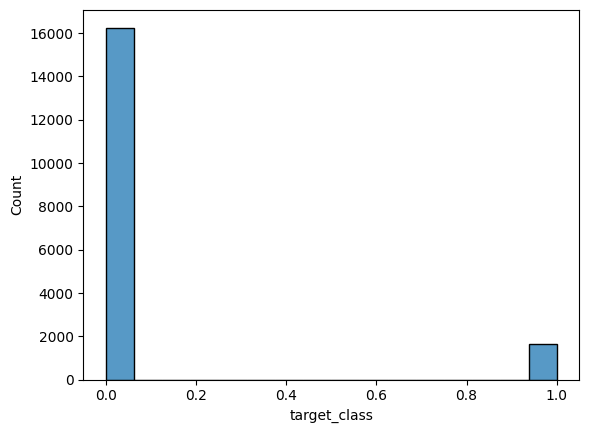

In [74]:
sns.histplot(x=dataset['target_class'])

### hist plot for features

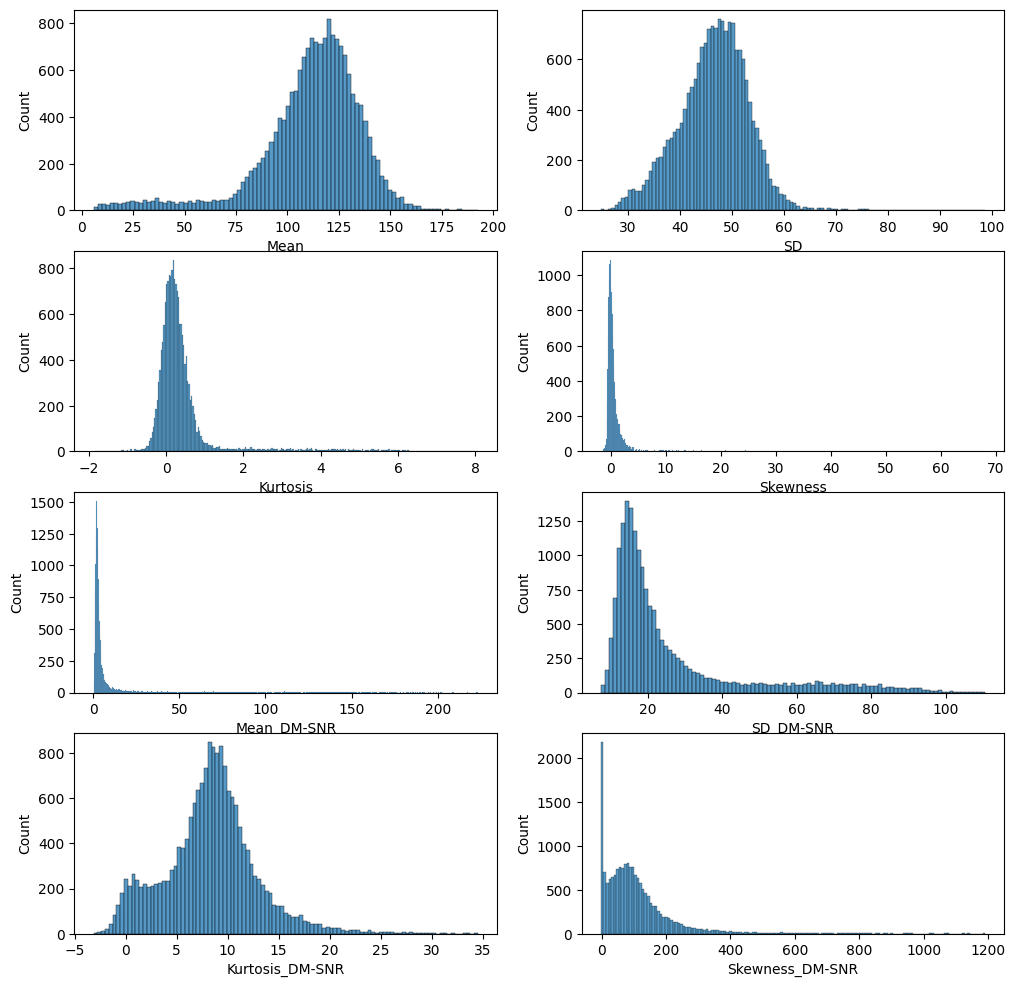

In [75]:
plt.figure(figsize=(12, 12))
plt.subplot(4, 2, 1)
dp1 = sns.histplot(x=dataset['Mean'])

plt.subplot(4, 2, 2)
dp2 = sns.histplot(x=dataset['SD'])

plt.subplot(4, 2, 3)
dp3 = sns.histplot(x=dataset['Kurtosis'])

plt.subplot(4, 2, 4)
dp4 = sns.histplot(x=dataset['Skewness'])

plt.subplot(4, 2, 5)
dp5 = sns.histplot(x=dataset['Mean_DM-SNR'])

plt.subplot(4, 2, 6)
dp6 = sns.histplot(x=dataset['SD_DM-SNR'])

plt.subplot(4, 2, 7)
dp7 = sns.histplot(x=dataset['Kurtosis_DM-SNR'])

plt.subplot(4, 2, 8)
dp8 = sns.histplot(x=dataset['Skewness_DM-SNR'])

plt.show()

### box plot for features

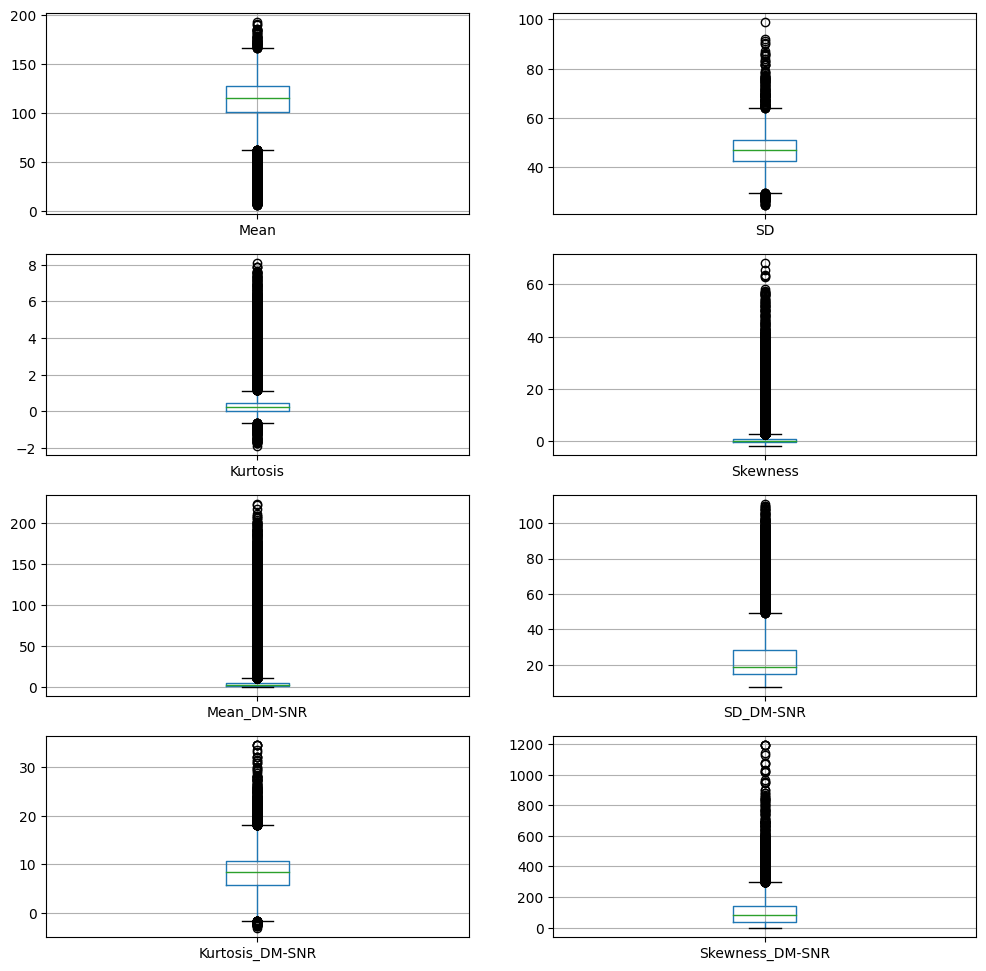

In [76]:
# sns.set_style(5)
plt.figure(figsize=(12, 12))
plt.subplot(4, 2, 1)
f1 = dataset.boxplot(column='Mean')

plt.subplot(4, 2, 2)
f2 = dataset.boxplot(column='SD')

plt.subplot(4, 2, 3)
f3 = dataset.boxplot(column='Kurtosis')

plt.subplot(4, 2, 4)
f4 = dataset.boxplot(column='Skewness')

plt.subplot(4, 2, 5)
f5 = dataset.boxplot(column='Mean_DM-SNR')

plt.subplot(4, 2, 6)
f6 = dataset.boxplot(column='SD_DM-SNR')

plt.subplot(4, 2, 7)
f7 = dataset.boxplot(column='Kurtosis_DM-SNR')

plt.subplot(4, 2, 8)
f8 = dataset.boxplot(column='Skewness_DM-SNR')

plt.show()

### Pairplot

c:\users\surya\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


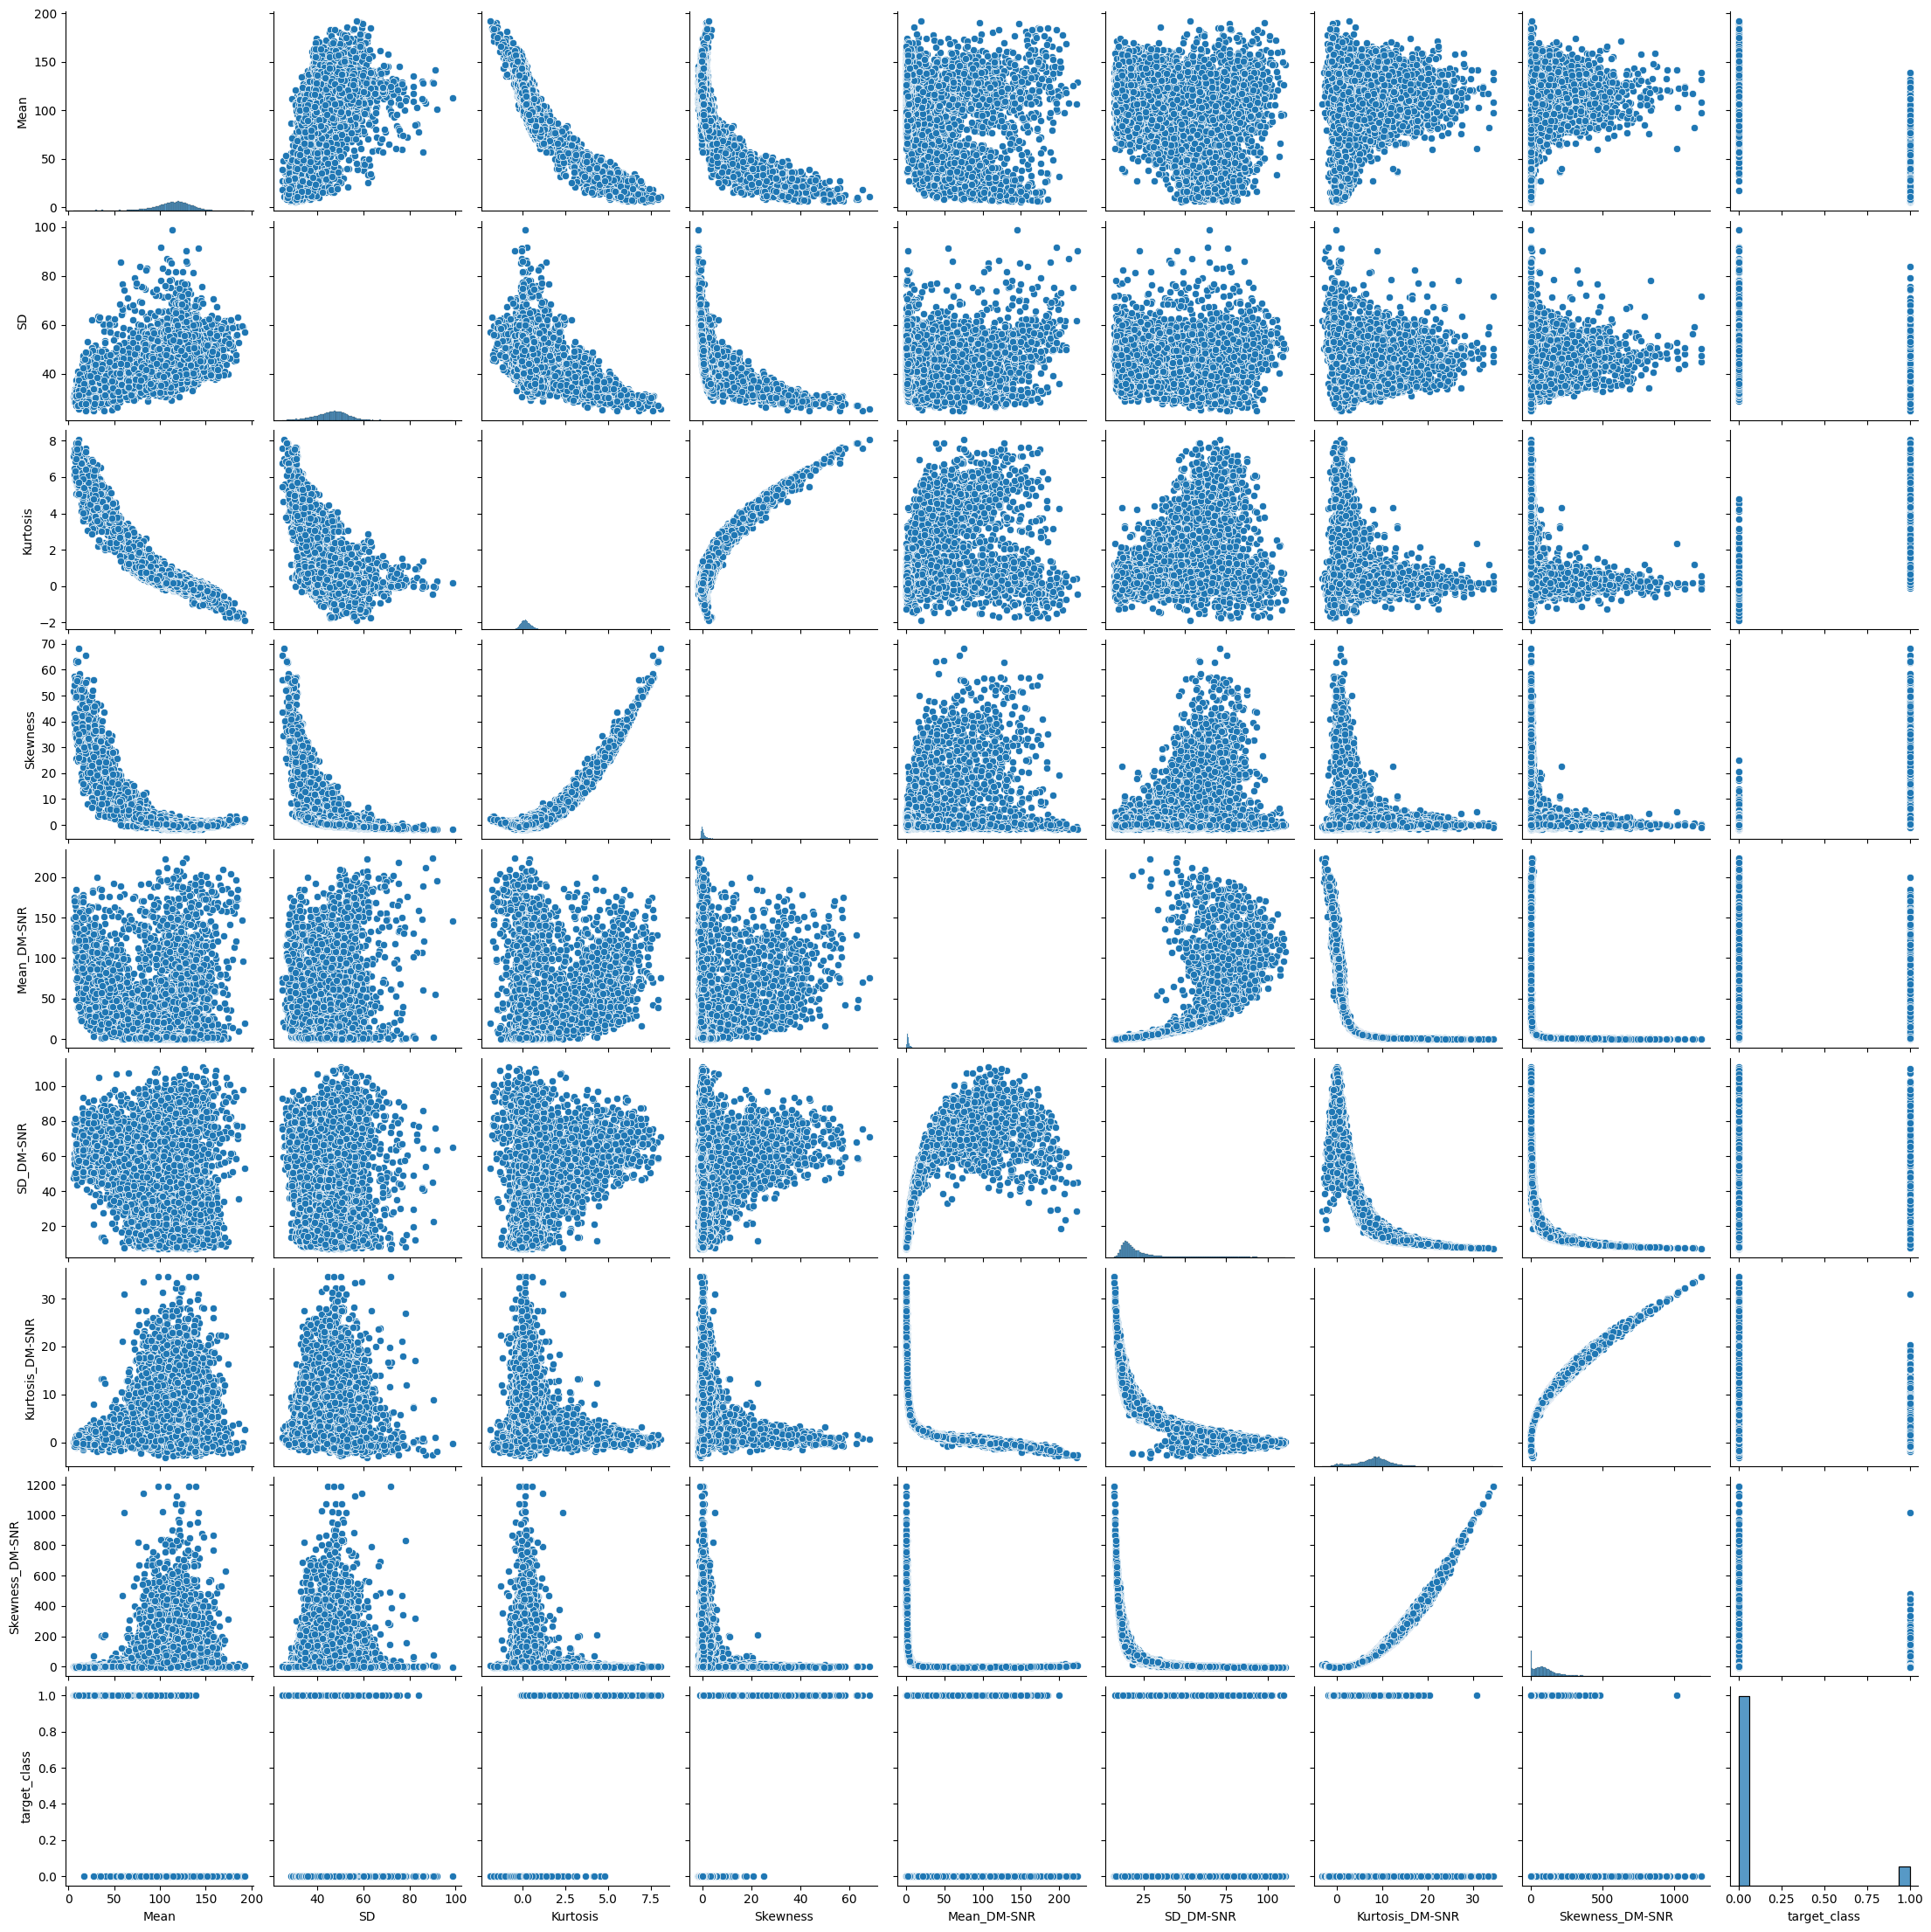

In [77]:
sns.pairplot(dataset)

## identify X & Y

In [78]:
x = dataset.iloc[ : , :-1].values
x[:2]

array([[140.5625    ,  55.68378214,  -0.23457141,  -0.6996484 ,
          3.19983278,  19.11042633,   7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815,  -0.51508791,
          1.67725752,  14.86014572,  10.57648674, 127.3935796 ]])

In [79]:
y = dataset.iloc[ : , -1].values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Splitting

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [82]:
x_train[:2]

array([[ 1.20640625e+02,  4.78429616e+01,  2.57962577e-01,
        -9.06199080e-02,  8.04849498e+00,  3.51982345e+01,
         4.81978426e+00,  2.35283829e+01],
       [ 1.16554688e+02,  4.87029915e+01,  1.97625250e-01,
         2.32600230e-01,  3.04180602e+00,  1.66106785e+01,
         8.16618510e+00,  8.48467094e+01]])

In [83]:
y_train[:5]

array([0, 0, 1, 0, 0], dtype=int64)

## PreProcessing

### Feature scaling

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc = StandardScaler()

In [86]:
x_train = sc.fit_transform(x_train)
x_train[:2]

array([[ 0.37710226,  0.18643192, -0.21304291, -0.30376654, -0.16236693,
         0.44549441, -0.76498842, -0.76290015],
       [ 0.21958464,  0.31196312, -0.26882602, -0.25234846, -0.32948472,
        -0.50223528, -0.02369848, -0.18468066]])

In [87]:
x_test = sc.fit_transform(x_test)
x_test[:2]

array([[-0.39574205, -0.106581  , -0.2062192 , -0.23805528, -0.33389687,
        -0.60628785,  0.24052962,  0.09688056],
       [ 0.3324866 ,  0.77538991, -0.28588937, -0.3480077 , -0.29508947,
        -0.32389767, -0.10358973, -0.30403506]])

## Linear SVM

### Modeling - Linear SVM

In [88]:
from sklearn.svm import SVC

In [89]:
lsvmc = SVC(C=1, kernel='linear', random_state=0)

### Training - Linear SVM

In [90]:
lsvmc.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

### Prediction - Linear SVM

In [91]:
lin_y_pred = lsvmc.predict(x_test)
lin_y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation - Linear SVM

#### confusion_matrix

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y_test, lin_y_pred)

array([[3289,   17],
       [  37,  237]], dtype=int64)

#### classification_report

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test, lin_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.86      0.90       274

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



#### accuracy_score

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test, lin_y_pred)

0.9849162011173185

#### precision_score

In [98]:
from sklearn.metrics import precision_score

In [99]:
precision_score(y_test, lin_y_pred)

0.9330708661417323

#### recall_score

In [100]:
from sklearn.metrics import recall_score

In [101]:
recall_score(y_test, lin_y_pred)

0.864963503649635

## Kernel SVM (c=1, kernel='rbf')

### Modeling - Kernel SVM (c=1, kernel='rbf')

In [102]:
from sklearn.svm import SVC

In [103]:
ksvmc = SVC(C=1, kernel='rbf', random_state=0)

### Training - Kernel SVM (c=1, kernel='rbf')

In [104]:
ksvmc.fit(x_train, y_train)

SVC(C=1, random_state=0)

### Prediction - Kernel SVM (c=1, kernel='rbf')

In [105]:
kernel_y_pred = ksvmc.predict(x_test)
kernel_y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation - Kernel SVM (c=1, kernel='rbf')

#### confusion_matrix

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_test, kernel_y_pred)

array([[3285,   21],
       [  40,  234]], dtype=int64)

#### classification_report

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(y_test, kernel_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.92      0.85      0.88       274

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



#### accuracy_score

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test, kernel_y_pred)

0.9829608938547486

#### precision_score

In [112]:
from sklearn.metrics import precision_score

In [113]:
precision_score(y_test, kernel_y_pred)

0.9176470588235294

#### recall_score

In [114]:
from sklearn.metrics import recall_score

In [115]:
recall_score(y_test, kernel_y_pred)

0.8540145985401459

#### roc_curve

In [117]:
from sklearn.metrics import roc_curve

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, kernel_y_pred)

In [119]:
print("False Positive Rate: ", fpr)
print("True Positive Rate: ", tpr)
print("Thresholds: ", thresholds)

False Positive Rate:  [0.         0.00635209 1.        ]
True Positive Rate:  [0.        0.8540146 1.       ]
Thresholds:  [inf  1.  0.]


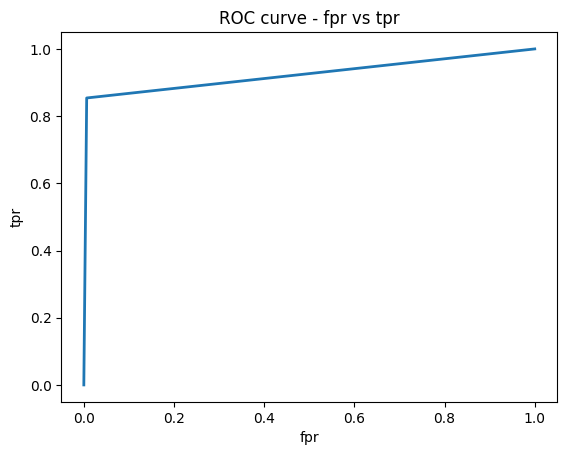

In [120]:
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve - fpr vs tpr")
plt.show()

#### roc_auc_score

In [121]:
from sklearn.metrics import roc_auc_score

In [122]:
roc_auc_score(y_test, kernel_y_pred)
# The higher the AUC, the better the model's performance at distinguishing
# between the positive and negative classes.
# An AUC score of 1 means the classifier can perfectly distinguish
# between all the Positive and the Negative class points.

0.9238312557129043

## Kernel SVM (c=100, kernel='poly')

### Modeling - Kernel SVM (c=100, kernel='poly')

In [123]:
from sklearn.svm import SVC

In [124]:
ksvm100poly = SVC(C=1, kernel='poly', random_state=0)

### Training - Kernel SVM (c=100, kernel='poly')

In [125]:
ksvm100poly.fit(x_train, y_train)

SVC(C=1, kernel='poly', random_state=0)

### Prediction - Kernel SVM (c=100, kernel='poly')

In [126]:
y_pred_ksvm100poly = ksvm100poly.predict(x_test)
y_pred_ksvm100poly[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation - Kernel SVM (c=100, kernel='poly')

#### confusion_matrix

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y_test, y_pred_ksvm100poly)

array([[3286,   20],
       [  42,  232]], dtype=int64)

#### classification_report

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test, y_pred_ksvm100poly))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.92      0.85      0.88       274

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



#### accuracy_score

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
accuracy_score(y_test, y_pred_ksvm100poly)

0.9826815642458101

#### precision_score

In [133]:
from sklearn.metrics import precision_score

In [134]:
precision_score(y_test, y_pred_ksvm100poly)

0.9206349206349206

#### recall_score

In [135]:
from sklearn.metrics import recall_score

In [136]:
recall_score(y_test, y_pred_ksvm100poly)

0.8467153284671532

#### roc_curve

In [137]:
from sklearn.metrics import roc_curve

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ksvm100poly)

In [139]:
print("False Positive Rate: ", fpr)
print("True Positive Rate: ", tpr)
print("Thresholds: ", thresholds)

False Positive Rate:  [0.         0.00604961 1.        ]
True Positive Rate:  [0.         0.84671533 1.        ]
Thresholds:  [inf  1.  0.]


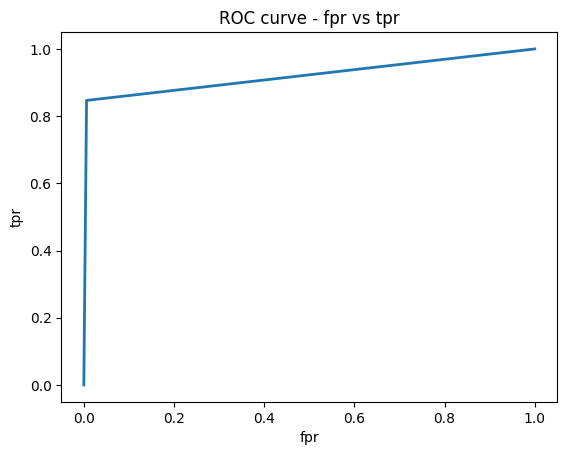

In [140]:
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve - fpr vs tpr")
plt.show()

#### roc_auc_score

In [141]:
from sklearn.metrics import roc_auc_score

In [142]:
roc_auc_score(y_test, y_pred_ksvm100poly)
# The higher the AUC, the better the model's performance at distinguishing
# between the positive and negative classes.
# An AUC score of 1 means the classifier can perfectly distinguish
# between all the Positive and the Negative class points.

0.9203328608457969

## Kernel SVM (c=100, kernel='sigmoid')

### Modeling - Kernel SVM (c=100, kernel='sigmoid')

In [143]:
from sklearn.svm import SVC

In [144]:
ksvm100sigmoid = SVC(C=100, kernel='sigmoid', random_state=0)

### Training - Kernel SVM (c=100, kernel='sigmoid')

In [145]:
ksvm100sigmoid.fit(x_train, y_train)

SVC(C=100, kernel='sigmoid', random_state=0)

### Prediction - Kernel SVM (c=100, kernel='sigmoid')

In [146]:
y_pred_ksvm100sigmoid = ksvm100sigmoid.predict(x_test)
y_pred_ksvm100sigmoid[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation - Kernel SVM (c=100, kernel='poly')

#### confusion_matrix

In [147]:
from sklearn.metrics import confusion_matrix

In [148]:
confusion_matrix(y_test, y_pred_ksvm100sigmoid)

array([[3013,  293],
       [ 188,   86]], dtype=int64)

#### classification_report

In [149]:
from sklearn.metrics import classification_report

In [150]:
print(classification_report(y_test, y_pred_ksvm100sigmoid))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3306
           1       0.23      0.31      0.26       274

    accuracy                           0.87      3580
   macro avg       0.58      0.61      0.59      3580
weighted avg       0.89      0.87      0.88      3580



#### accuracy_score

In [151]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test, y_pred_ksvm100sigmoid)

0.8656424581005586

#### precision_score

In [153]:
from sklearn.metrics import precision_score

In [154]:
precision_score(y_test, y_pred_ksvm100sigmoid)

0.22691292875989447

#### recall_score

In [155]:
from sklearn.metrics import recall_score

In [156]:
recall_score(y_test, y_pred_ksvm100sigmoid)

0.31386861313868614

#### roc_curve
 - Reciever Operating Characteristic curve
 - can be used to evaluate classification, mostly used for binary classifiers such as Logistic regression/classification or sigmoid classification

In [157]:
from sklearn.metrics import roc_curve

In [158]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ksvm100sigmoid)

In [159]:
print("False Positive Rate: ", fpr)
print("True Positive Rate: ", tpr)
print("Thresholds: ", thresholds)

False Positive Rate:  [0.         0.08862674 1.        ]
True Positive Rate:  [0.         0.31386861 1.        ]
Thresholds:  [inf  1.  0.]


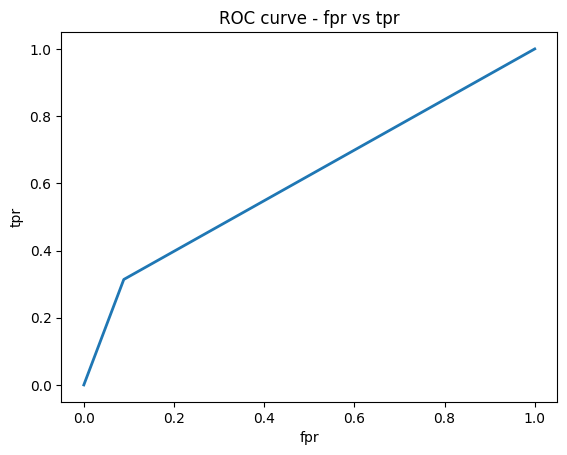

In [160]:
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve - fpr vs tpr")
plt.show()

#### roc_auc_score
- Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

In [161]:
from sklearn.metrics import roc_auc_score

In [162]:
roc_auc_score(y_test, y_pred_ksvm100sigmoid)
# Area Under the Receiver Operating Characteristic Curve (ROC AUC)
# from prediction scores.
# The higher the AUC, the better the model's performance at distinguishing
# between the positive and negative classes.
# An AUC score of 1 means the classifier can perfectly distinguish
# between all the Positive and the Negative class points.

0.612620936938369